# TensorFlow Assignment: Multilayer Perceptron (MLP) Optimizer Sandbox

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: [Ying Zhai]

## Multilayer Perceptron (MLP)

### Imports and helper functions

Let's play around with some optimizers. First some imports and helper functions:

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# Helper functions for creating weight variables
def weight_variable(shape):
    """weight_variable generates a weight variable of a given shape."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """bias_variable generates a bias variable of a given shape."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

### Models

And here's the forward pass of the computation graph definition of the completed TensorFlow MLP assignment:

In [4]:
# Model Inputs
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# Define the graph
# First fully connected layer
W_fc1 = weight_variable([784, 500])
b_fc1 = bias_variable([500])
# h_fc1 = tf.nn.sigmoid(tf.matmul(x, W_fc1) + b_fc1)
h_fc1 = tf.nn.relu(tf.matmul(x, W_fc1) + b_fc1)

# Second fully connected layer
W_fc2 = weight_variable([500, 10])
b_fc2 = bias_variable([10])
y_mlp = tf.matmul(h_fc1, W_fc2) + b_fc2

# Loss 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_mlp))

# Evaluation
correct_prediction = tf.equal(tf.argmax(y_mlp, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizers

Instead of the optimizer being given though, let's try out a few. Here we have optimizers implementing algorithms for [Stochastic Gradient Descent](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) (SGD), [Stochastic Gradient Descent with Momentum](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer) (momentum), and [Adaptive Moments](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) (ADAM). Try out different parameter settings (e.g. learning rate) for each of them.

In [ ]:
# Optimizers: Try out a few different parameters for SGD and SGD momentum
train_step_SGD = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cross_entropy)
train_step_momentum = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.5).minimize(cross_entropy)
train_step_ADAM = tf.train.AdamOptimizer().minimize(cross_entropy)

# Op for initializing all variables
initialize_all = tf.global_variables_initializer()

### Training

Because we'll be repeating training a few times, let's move our training regimen into function. Note that we pass which optimization algorithm we're running as an argument. In addition to printing out the validation accuracy and final test accuracy, we'll also return the lists of accuracies at each validation step and the training losses at each iteration.

In [13]:
def train_MLP(train_step_optimizer, iterations=4000):
    with tf.Session() as sess:
        # Initialize (or reset) all variables
        sess.run(initialize_all)
        
        # Initialize arrays to track losses and validation accuracies
        valid_accs = [] 
        losses = []
        
        for i in range(iterations):
            # Validate every 250th batch
            if i % 250 == 0:
                validation_accuracy = 0
                for v in range(10):
                    batch = mnist.validation.next_batch(50)
                    validation_accuracy += (1/10) * accuracy.eval(feed_dict={x: batch[0], y_: batch[1]})
                print('step %d, validation accuracy %g' % (i, validation_accuracy))
                valid_accs.append(validation_accuracy)
                
            # Train    
            batch = mnist.train.next_batch(50)
            loss, _ = sess.run([cross_entropy, train_step_optimizer], feed_dict={x: batch[0], y_: batch[1]})
            losses.append(loss)
            
        print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
        
    return valid_accs, losses

Finally, let's train the MLP using all three optimizers and compare the results:

In [15]:
print("SGD:")
valid_accs_SGD, losses_SGD = train_MLP(train_step_SGD)
print("Momentum:")
valid_accs_momentum, losses_momentum = train_MLP(train_step_momentum)
print("ADAM:")
valid_accs_ADAM, losses_ADAM = train_MLP(train_step_ADAM)

SGD:
step 0, validation accuracy 0.102
step 250, validation accuracy 0.85
step 500, validation accuracy 0.872
step 750, validation accuracy 0.886
step 1000, validation accuracy 0.91
step 1250, validation accuracy 0.88
step 1500, validation accuracy 0.912
step 1750, validation accuracy 0.922
step 2000, validation accuracy 0.926
step 2250, validation accuracy 0.9
step 2500, validation accuracy 0.912
step 2750, validation accuracy 0.918
step 3000, validation accuracy 0.934
step 3250, validation accuracy 0.948
step 3500, validation accuracy 0.914
step 3750, validation accuracy 0.956
test accuracy 0.9304
Momentum:
step 0, validation accuracy 0.09
step 250, validation accuracy 0.884
step 500, validation accuracy 0.91
step 750, validation accuracy 0.906
step 1000, validation accuracy 0.896
step 1250, validation accuracy 0.91
step 1500, validation accuracy 0.922
step 1750, validation accuracy 0.92
step 2000, validation accuracy 0.958
step 2250, validation accuracy 0.944
step 2500, validation a

### Visualization

Plotting things:

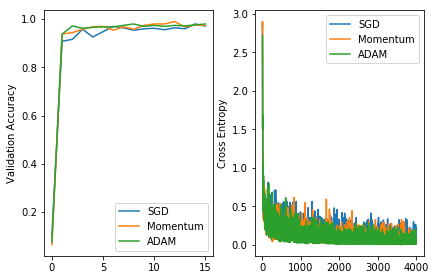

In [9]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()

ax[0].plot(valid_accs_SGD)
ax[0].plot(valid_accs_momentum)
ax[0].plot(valid_accs_ADAM)

ax[0].set_ylabel('Validation Accuracy')
ax[0].legend(['SGD', 'Momentum', 'ADAM'], loc='lower right')

ax[1].plot(losses_SGD)
ax[1].plot(losses_momentum)
ax[1].plot(losses_ADAM)

ax[1].set_ylabel('Cross Entropy')
ax[1].legend(['SGD', 'Momentum', 'ADAM'], loc='upper right')
# ax[1].set_ylim([0,1.5])  # <- Use this to change y-axis limits

### Short Answer

How do SGD, SGD with momentum, and ADAM compare in performance? Ease of tuning parameters?

***
SGD: The recognition rate of SGD fluctuates greatly and is lower than the other two methods'rate with the same iterations. And the cross Entropy of SGD is higher than others.

SGD with momentum: With the number of iterations increasing, the recognition performance of SGD with momentum increases steadily. What's more, with the fewer number of iterations, the performance of SGD with momentum is better than SGD. 

ADAM: With the fewer number of iterations,the recognition rate of ADAM is much higher than the other two methods. What's more, ADAM has smaller cross Entropy, better recognition performance and faster convergence speed. However, compared with the other two methods, the training process of ADAM costs more time.

Due to the flexibility of the model,it's not easy to tune the model's parameters.
***

## Convolutional Neural Network (CNN): *Optional*

Adapt the MLP code above to train a CNN instead (*Hint: you can adapt the code from the 01D_MLP_CNN_Assignment_Solutions.ipynb for the CNN just like I did for the MLP*), and again compare the optimizers. The more complex nature of the CNN parameter space means that the differences between optimizers should be much more significant.

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Helper functions for creating weight variables
def weight_variable(shape):
    """weight_variable generates a weight variable of a given shape."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """bias_variable generates a bias variable of a given shape."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# Convolutional neural network functions
def conv2d(x, W):
    """conv2d returns a 2d convolution layer with full stride."""
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    """max_pool_2x2 downsamples a feature map by 2X."""
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Tensorflow Function that might also be of interest:
# tf.reshape()
# Model Inputs
x = tf.placeholder(tf.float32, [None, 784])  
y_ = tf.placeholder(tf.float32, [None, 10])
x_image = tf.reshape(x,[-1,28,28,1])

# Define the graph
w_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, w_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


w_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, w_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

w_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)


W = weight_variable([1024, 10])
b = bias_variable([10])
y_conv = tf.matmul(h_fc1, W) + b

### Make sure to name your CNN output as y_conv ###


# Loss 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

# Evaluation
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Optimizers: Try out a few different parameters for SGD and SGD momentum
train_step_SGD = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)
train_step_momentum = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.5).minimize(cross_entropy)
train_step_ADAM = tf.train.AdamOptimizer().minimize(cross_entropy)

# Op for initializing all variables
initialize_all = tf.global_variables_initializer()

def train_CNN(train_step_optimizer, iterations=4000):
    with tf.Session() as sess:
        # Initialize all variables
        sess.run(tf.global_variables_initializer())
        
        # Initialize arrays to track losses and validation accuracies
        valid_accs = [] 
        losses = []
        
        # Training regimen
        for i in range(iterations):
            # Validate every 250th batch
            if i % 250 == 0:
                validation_accuracy = 0
                for v in range(10):
                    batch = mnist.validation.next_batch(50)
                    validation_accuracy += (1/10) * accuracy.eval(feed_dict={x: batch[0], y_: batch[1]})
                print('step %d, validation accuracy %g' % (i, validation_accuracy))
            
            # Train    
            batch = mnist.train.next_batch(50)
            loss, _ = sess.run([cross_entropy, train_step_optimizer], feed_dict={x: batch[0], y_: batch[1]})
            losses.append(loss)
    
        print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    return valid_accs, losses


print("SGD:")
valid_accs_SGD, losses_SGD = train_CNN(train_step_SGD)
print("Momentum:")
valid_accs_momentum, losses_momentum = train_CNN(train_step_momentum)
print("ADAM:")
valid_accs_ADAM, losses_ADAM = train_CNN(train_step_ADAM)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
SGD:
step 0, validation accuracy 0.136
step 250, validation accuracy 0.916
step 500, validation accuracy 0.962
step 750, validation accuracy 0.96
step 1000, validation accuracy 0.964
step 1250, validation accuracy 0.966
step 1500, validation accuracy 0.966
step 1750, validation accuracy 0.974
step 2000, validation accuracy 0.968
step 2250, validation accuracy 0.972
step 2500, validation accuracy 0.986
step 2750, validation accuracy 0.976
step 3000, validation accuracy 0.974
step 3250, validation accuracy 0.976
step 3500, validation accuracy 0.988
step 3750, validation accuracy 0.986
test accuracy 0.9835
Momentum:
step 0, validation accuracy 0.088
step 250, validation accuracy 0.944
step 500, validation accuracy 0.96
step 750, validation accuracy 0.984
step 1000, validation accuracy 0.98
step 125

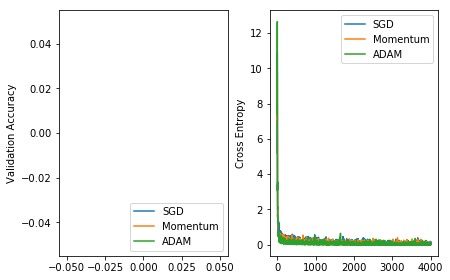

In [26]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()

ax[0].plot(valid_accs_SGD)
ax[0].plot(valid_accs_momentum)
ax[0].plot(valid_accs_ADAM)

ax[0].set_ylabel('Validation Accuracy')
ax[0].legend(['SGD', 'Momentum', 'ADAM'], loc='lower right')

ax[1].plot(losses_SGD)
ax[1].plot(losses_momentum)
ax[1].plot(losses_ADAM)

ax[1].set_ylabel('Cross Entropy')
ax[1].legend(['SGD', 'Momentum', 'ADAM'], loc='upper right')
# ax[1].set_ylim([0,1.5])  # <- Use this to change y-axis limits

In [ ]:
## Short Answer
## SGD: The recognition rate of SGD fluctuates greatly and is lower than the other two methods'rate with the same 
## iterations. And the cross Entropy of SGD is higher than others.

## SGD with momentum: The recognition rate of SGD with momentum fluctuates slightly. And the performance is better 
## than SGD but worse than ADAM. 

## ADAM: With the number of iterations increasing, the recognition performance of ADAM increases steadily. 
## With the fewer number of iterations,the recognition rate of ADAM is much higher than the other two methods. 
## What's more, ADAM has smaller cross Entropy, better recognition performance and faster convergence speed. 

## Due to the flexibility of the model,it's not easy to tune the model's parameters